<a href="https://colab.research.google.com/github/galexbh/credit-card-customers-prediction/blob/main/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform the following activities:
- Edit the null variables:
 - In case the column has more than 90% null values exclude.
 - In case it is a numeric variable, identify a good strategy to replace the null values with the median value.
In case it is a numerical variable, identify a good strategy to replace the null values by the median value.
 - In case they are categorical variables, replace by the value "others".
- Clean up the numeric variables:
 - Identify and explain a good stratification of how continuous numerical values should be analyzed.
analyzed the continuous numerical values.
 - In case there are outliers in these stratifications for the continuous numerical values, replace them with the mean.
- Clean categorical variables
 - According to the continuous values cleaning treatment techniques, clean and transform the categorical variables.
 - Leave in CSVs the translations or rules you generate from the categorical variables.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_bank_churners = pd.read_csv("/content/drive/MyDrive/UNAH/IA/exam_III/BankChurners.csv")

In [42]:
df_bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [43]:
size_bank_churners = df_bank_churners.shape[0]
size_bank_churners

10127

In [44]:
# returns the number of missing values in the data set
df_bank_churners.isnull().sum().to_frame('nulls')

,nulls
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [45]:
columns_valid = []
threshold = .90

# In case the column has more than 90% null values exclude.
for c_ in df_bank_churners.columns:
    level = np.sum((pd.isna( df_bank_churners.loc[ : , c_ ] )) / size_bank_churners)
    if level >= threshold:
        data = data.drop(columns=c_)

    columns_valid.append(c_)

columns_valid    

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [50]:
# If they are categorical variables, replace with the value "others"
var_categorical = df_bank_churners.loc[ : ,columns_valid ].select_dtypes('object').astype('category')
var_categorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [60]:
copy_bank_ch = df_bank_churners.copy()

level = copy_bank_ch.groupby(["Education_Level"], as_index = False)\
.agg({"Customer_Age":["count"]})

level.columns = level.columns.droplevel(1)

level["Percent"] = (level["Customer_Age"] / size_bank_churners)

level.sort_values(["Percent"], ascending = False)

level["Education_t"] = "Others"

level["Education_t"] = level\
.apply(lambda r: r["Education_Level"] if r["Percent"] > 0.1 else r["Education_t"], axis=1)

level.loc[:,["Education_Level", "Education_t"]]

copy_bank_ch = copy_bank_ch.merge(level, on= ["Education_Level"], how = "inner")

copy_bank_ch.tail(5).loc[: ,["Education_t"]]


,Education_t
10122,Others
10123,Others
10124,Others
10125,Others
10126,Others


In [55]:
level.to_csv("categorical-variables.csv")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbd52297d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbd521a2690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbd522cd590>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd5226a2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd522bf650>],
 'means': []}

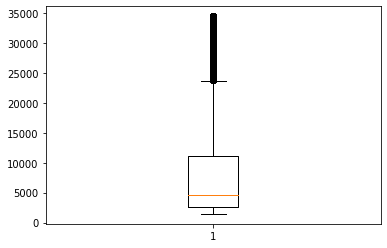

In [56]:
# We take is to have the most outliers
plt.boxplot(copy_bank_ch["Credit_Limit"])

In [57]:
copy_bank_ch.loc[:,"Credit_Limit"].value_counts()  / size_bank_churners

34516.0    0.050163
1438.3     0.050064
9959.0     0.001777
15987.0    0.001777
23981.0    0.001185
             ...   
27374.0    0.000099
10859.0    0.000099
19402.0    0.000099
15069.0    0.000099
4552.0     0.000099
Name: Credit_Limit, Length: 6205, dtype: float64

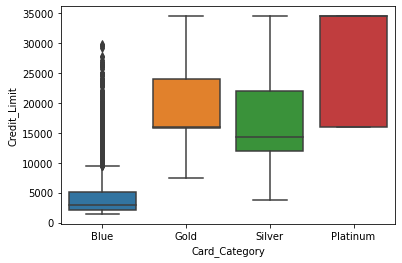

In [68]:
sns.boxplot(data = copy_bank_ch.loc[ (copy_bank_ch['Gender'] == 'F'), : ], x= 'Card_Category', y ='Credit_Limit' )

In [66]:
copy_bank_ch["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [69]:
limit_b = copy_bank_ch.loc[(copy_bank_ch["Gender"] == "M") & (copy_bank_ch["Card_Category"] == "Blue"), ["Credit_Limit"]]
limit_b

,Credit_Limit
0,12691.0
3,3193.0
4,4470.0
5,14784.0
6,4785.0
...,...
10115,27124.0
10116,22715.0
10119,3676.0
10122,10292.0


In [78]:
q1 = np.quantile(limit_b,0.25)
q3 = np.quantile(limit_b,0.75)
q2 = np.median(limit_b)
iqr = (q3 - q1)
print("iqr: ", iqr)

iqr:  12067.5


In [79]:
# We will look at the upper outliers
upper = q3 + (1.5 * iqr)
print("upper: ", upper)
# We will see the lower outliers
lower = q1 - (1.5*iqr)
print("lower: ", lower)

upper:  33703.25
lower:  -14566.75


Being of a negative value, the lower outliers will not be taken into account, we can even notice in the graph that these types of values ​​are not found

In [80]:
limit_b.loc[(limit_b["Credit_Limit"] > upper) & (limit_b["Credit_Limit"] > lower), :]

,Credit_Limit
44,34516.0
79,34516.0
110,34516.0
137,34516.0
255,34516.0
...,...
9830,34516.0
10080,34516.0
10082,34516.0
10086,34516.0


### Stratification

In [81]:
dfq1 = copy_bank_ch.loc[:,["Gender","Card_Category","Credit_Limit"]].groupby(["Gender","Card_Category"],as_index=False).quantile(0.25)
dfq1.columns = ["Gender","Card_Category","Credit_B1"]

dfq3 = copy_bank_ch.loc[:,["Gender","Card_Category","Credit_Limit"]].groupby(["Gender","Card_Category"],as_index=False).quantile(0.75)
dfq3.columns = ["Gender","Card_Category","Credit_B3"]

dfq2 = copy_bank_ch.loc[:,["Gender","Card_Category","Credit_Limit"]].groupby(["Gender","Card_Category"],as_index=False).quantile(0.50)
dfq2.columns = ["Gender","Card_Category","Credit_B2"]

In [82]:
df_iqr = dfq1.merge(dfq3, on = ["Gender", "Card_Category"], how = "inner")\
.merge(dfq2, on = ["Gender", "Card_Category"], how = "inner")
df_iqr["IQR"] = df_iqr.apply(lambda r: r["Credit_B3"] - r["Credit_B1"], axis=1)
df_iqr["Upper"] = df_iqr.apply(lambda j: (j["Credit_B3"] + 1.5*j["IQR"]), axis=1)
df_iqr["Lower"] = df_iqr.apply(lambda j: (j["Credit_B1"] - 1.5*j["IQR"]), axis=1)
df_iqr

,Gender,Card_Category,Credit_B1,Credit_B3,Credit_B2,IQR,Upper,Lower
0,F,Blue,2112.00,5076.0,2945.0,2964.00,9522.000,-2334.000
1,F,Gold,15774.75,23981.0,15987.0,8206.25,36290.375,3465.375
2,F,Platinum,15987.00,34516.0,34516.0,18529.00,62309.500,-11806.500
3,F,Silver,12048.25,21979.0,14320.0,9930.75,36875.125,-2847.875
4,M,Blue,3534.50,15602.0,7685.0,12067.50,33703.250,-14566.750
5,M,Gold,34516.00,34516.0,34516.0,0.00,34516.000,34516.000
6,M,Platinum,34516.00,34516.0,34516.0,0.00,34516.000,34516.000
7,M,Silver,26142.00,34516.0,34516.0,8374.00,47077.000,13581.000


In [85]:
transform_bank_ch = copy_bank_ch.merge(df_iqr, on = ["Gender", "Card_Category"], how = "left").copy()
print("bank churners", copy_bank_ch.shape[0])
print("transform bank churners", transform_bank_ch.shape[0])

bank churners 10127
transform bank churners 10127


In [86]:
def getCredit(r):
    if ((r["Credit_Limit"] <= r["Lower"]) or (r["Credit_Limit"]>= r["Upper"])):
        return r["Credit_B2"]
    else:
        return r["Credit_Limit"]

In [87]:
transform_bank_ch["New_Credit"] = transform_bank_ch.apply(lambda r: getCredit(r), axis = 1)
transform_bank_ch

,CLIENTNUM,Attrition_Flag,Customer_Age_x,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Customer_Age_y,Percent,Education_t,Credit_B1,Credit_B3,Credit_B2,IQR,Upper,Lower,New_Credit
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,2013,0.198776,High School,3534.5,15602.0,7685.0,12067.5,33703.25,-14566.75,12691.0
1,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2013,0.198776,High School,2112.0,5076.0,2945.0,2964.0,9522.00,-2334.00,3313.0
2,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2013,0.198776,High School,26142.0,34516.0,34516.0,8374.0,47077.00,13581.00,29081.0
3,806160108,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,...,2013,0.198776,High School,3534.5,15602.0,7685.0,12067.5,33703.25,-14566.75,3193.0
4,784725333,Existing Customer,41,M,3,High School,Married,$40K - $60K,Blue,33,...,2013,0.198776,High School,3534.5,15602.0,7685.0,12067.5,33703.25,-14566.75,4470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,780097533,Existing Customer,48,M,3,Doctorate,Divorced,$80K - $120K,Blue,33,...,451,0.044534,Others,3534.5,15602.0,7685.0,12067.5,33703.25,-14566.75,10292.0
10123,714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,...,451,0.044534,Others,2112.0,5076.0,2945.0,2964.0,9522.00,-2334.00,5173.0
10124,816517683,Existing Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,33,...,451,0.044534,Others,2112.0,5076.0,2945.0,2964.0,9522.00,-2334.00,7530.0
10125,779134458,Attrited Customer,33,F,1,Doctorate,Single,Less than $40K,Blue,15,...,451,0.044534,Others,2112.0,5076.0,2945.0,2964.0,9522.00,-2334.00,3709.0


,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

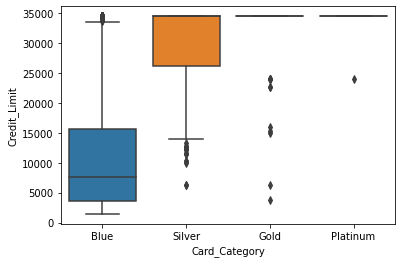

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

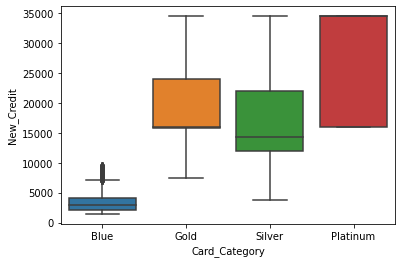

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

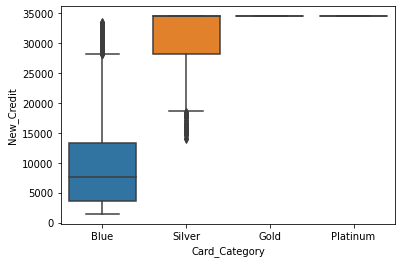

<IPython.core.display.Javascript object>

In [99]:
from google.colab import widgets
grid = widgets.Grid(1, 3, header_row=True, header_column=True)
with grid.output_to(0, 0):
    sns.boxplot(data = copy_bank_ch.loc[ (copy_bank_ch['Gender'] == 'M'), : ], x= 'Card_Category', y ='Credit_Limit' )
with grid.output_to(0, 1):
    sns.boxplot(data = transform_bank_ch.loc[ (transform_bank_ch['Gender'] == 'F'), : ], x= 'Card_Category', y ='New_Credit' )
with grid.output_to(0, 2):
    sns.boxplot(data = transform_bank_ch.loc[ (transform_bank_ch['Gender'] == 'M'), : ], x= 'Card_Category', y ='New_Credit' )